### Load VGG19 Model

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
model = tf.keras.applications.vgg19.VGG19(weights='imagenet')

W0801 19:08:09.555784 139905434371968 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


574717952/574710816 [==============================] - 8s 0us/step


### Load an Image

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


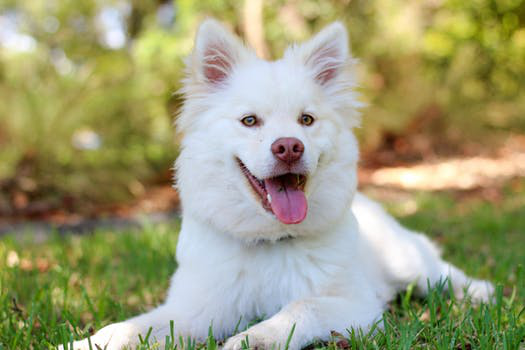

In [9]:
from google.colab import drive
drive.mount('/gdrive')
img = tf.keras.preprocessing.image.load_img('/gdrive/My Drive/ABB Deep Learning/Tensorboard/dog.jpeg')
img

### Prediction

In [0]:
import numpy as np

In [11]:
#Prepare image prediction
img_array = tf.keras.preprocessing.image.img_to_array(img.resize((224, 224)))

#Normalize the image
img_array[:,:,0] -= 103.939
img_array[:,:,1] -= 116.779
img_array[:,:,2] -= 123.68

#Create a batch
img_array = np.expand_dims(img_array, axis=0)

#Get the prediction
prediction = model.predict(img_array)

#Get the index with highest probability
pred_index = np.argmax(prediction[0])

#Decode prediction
prediction = tf.keras.applications.vgg19.decode_predictions(prediction)

pred_index, prediction

40960/35363 [==================================] - 0s 0us/step


(258,
 [[('n02111889', 'Samoyed', 0.26756185),
   ('n02099601', 'golden_retriever', 0.13649142),
   ('n02111500', 'Great_Pyrenees', 0.12750445),
   ('n02109961', 'Eskimo_dog', 0.115322456),
   ('n02106030', 'collie', 0.07428804)]])

ImageNet Class IDs
- https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

### Building Saliency Maps

Access model input and output

In [0]:
input_img = model.input
model_output = model.output

What should be the loss?

In [0]:
loss = tf.keras.backend.mean(model_output[:,258])

Calculate Gradients

In [0]:
#Gradient of loss w.r.t input image
grads = tf.keras.backend.gradients(loss, input_img)[0]

#Gradient normalization
K = tf.keras.backend
grads /= K.sqrt(K.mean(K.square(grads))) + K.epsilon()

#Define function to run Graph
iterate = K.function([input_img], [loss, grads])

In [0]:
loss_value, grads_value = iterate([img_array])

### Plot Gradients as Saliency Map

In [0]:
import matplotlib.pyplot as plt

W0801 19:13:36.878715 139905434371968 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


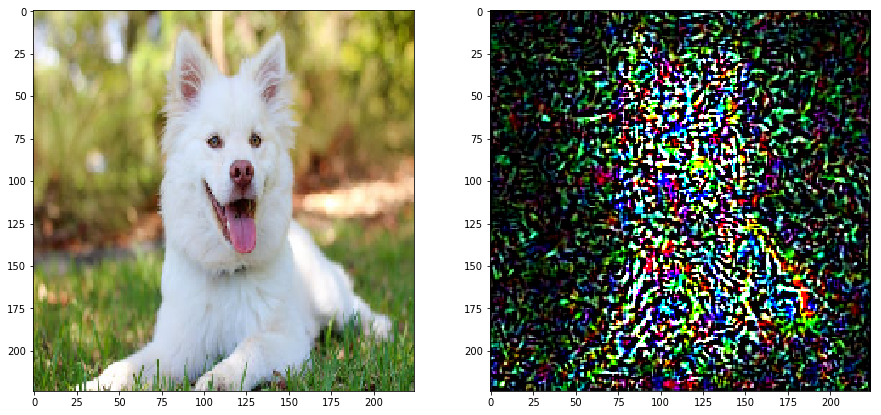

In [17]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img.resize((224,224)))
plt.subplot(1,2,2)
plt.imshow(grads_value[0], cmap='jet')
plt.show()